In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("NIFTY 50_minute.csv")

In [3]:
df.head()


,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0.0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0.0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0.0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0.0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0.0


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)


In [5]:
df = df.ffill()


In [6]:
daily_close = df['close'].resample('D').last()
daily_close = daily_close.dropna()


In [7]:
daily_returns = daily_close.pct_change().dropna()


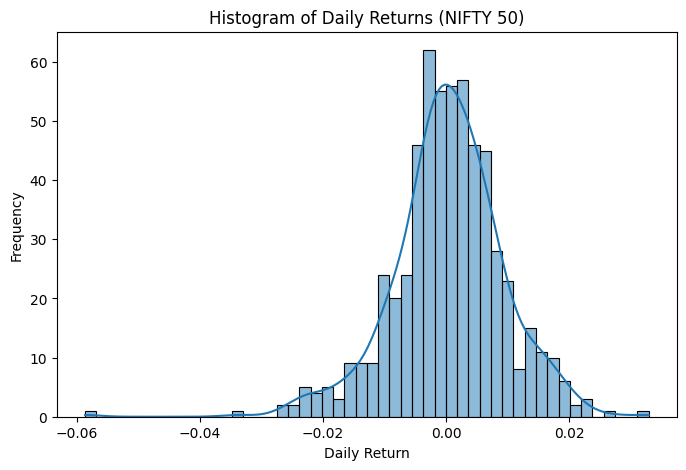

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(daily_returns, bins=50, kde=True)
plt.title("Histogram of Daily Returns (NIFTY 50)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


In [9]:
rolling_vol = daily_returns.rolling(window=20).std()


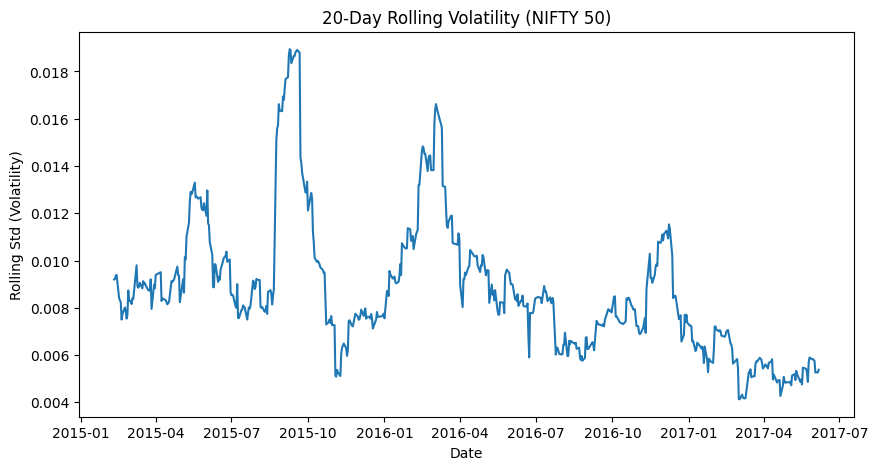

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(rolling_vol)
plt.title("20-Day Rolling Volatility (NIFTY 50)")
plt.xlabel("Date")
plt.ylabel("Rolling Std (Volatility)")
plt.show()
